In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.feature_selection import SelectKBest
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Data loading

In [ ]:
data=pd.read_csv("adult21.csv")
data20=pd.read_csv("adult20.csv")

In [ ]:
str="CVDDIAG_A, ANXFREQ_A, ANXMED_A, ANXLEVEL_A, DEPFREQ_A, DEPMED_A, DEPLEVEL_A, MHRX_A, MHTHRPY_A, PAIFRQ3M_A, SMKCIGST_A, SMKECIGST_A, CIGAREV_A, PIPEEV_A, SMOKELSEV_A, SUPPORT_A, CMPSUPPORT_A, ORIENT_A, MARSTAT_A, PARSTAT_A, EMPWRKLSW1_A, EMPWRKFT1_A, EMDINDSTN1_A, EMDINDSTN2_A, EMDOCCUPN1_A, EMDOCCUPN2_A, EMDSUPER_A, EMDWRKCAT1_A, RATCAT_A, FDSCAT4_A, WEIGHTLBTC_A, AGEP_A, SEX_A, HISP_A, HYPEV_A, HYPMED_A, CHLEV_A, CHLMED_A, CHDEV_A, ANGEV_A, MIEV_A, STREV_A, ASEV_A, CANEV_A, PREDIB_A, DIBEV_A, DIBINS_A, DIBTYPE_A, BMICAT_A, RACEALLP_A"
li=str.split(", ")
finaldata=data[li]
str="CVDDIAG_A, ANXFREQ_A, ANXMED_A, ANXLEVEL_A, DEPFREQ_A, DEPMED_A, DEPLEVEL_A, MHRX_A, MHTHRPY_A, PAIFRQ3M_A, SMKCIGST_A, SMKECIGST_A, CIGAREV_A, PIPEEV_A, SMOKELSEV_A, SUPPORT_A, CMPSUPPORT_A, ORIENT_A, MARSTAT_A, PARSTAT_A, EMPWRKLSWK_A, EMPWRKFT_A, EMDINDSTR1_A, EMDINDSTR2_A, EMDOCCUPR1_A, EMDOCCUPR2_A, EMDSPRVIS_A, EMDWRKCAT_A, RATCAT_A, FDSCAT4_A, WEIGHTLBTC_A, AGEP_A, SEX_A, HISP_A, HYPEV_A, HYPMED_A, CHLEV_A, CHLMED_A, CHDEV_A, ANGEV_A, MIEV_A, STREV_A, ASEV_A, CANEV_A, PREDIB_A, DIBEV_A, DIBINS_A, DIBTYPE_A, BMICAT_A, RACEALLP_A"

li=str.split(", ")
finaldata20=data20[li]
finaldata20=finaldata20.rename(columns={"EMPWRKFT_A": "EMPWRKFT1_A", "EMDINDSTR1_A": "EMDINDSTN1_A", "EMDINDSTR2_A": "EMDINDSTN2_A", "EMDOCCUPR1_A": "EMDOCCUPN1_A", "EMDOCCUPR2_A": "EMDOCCUPN2_A", "EMDSPRVIS_A": "EMDSUPER_A", "EMDWRKCAT_A": "EMDWRKCAT1_A","EMPWRKLSWK_A": "EMPWRKLSW1_A"})

merged=pd.concat([finaldata,finaldata20], axis=0)
merged.shape

(61050, 50)

In [ ]:
#str="SMKSTAT2, ASISIM, ASISIM, R_MARITL, PAR_STAT, DOINGLWA, INDSTRN1, INDSTRN2, OCCUPN1, OCCUPN2, EMDSPRVIS_A, EMDWRKCAT_A, RATCAT_A, FDSCAT4_A, WTFA_SA, AGE_P, SEX, HISPAN_I, HYPEV, HYPMED_A, CHLEV, CHLMED_A, CHDEV, ANGEV, MIEV, STREV, ASEV_A, CANEV_A, PREDIB_A, DIBEV1, DIBINS_A, DIBTYPE_A, BMICAT_A, RACEALLP_A"
#li=str.split(", ")
#finaldata18=data18[li]
#finaldata18.info()

In [ ]:
#Checking missing values dependencies
print(np.isnan(merged[merged['HYPEV_A'] != 1]['HYPMED_A'].to_numpy()).all())
print(np.isnan(merged[merged['CHLEV_A'] != 1]['CHLMED_A'].to_numpy()).all())
predib_a = (merged['PREDIB_A'] != 1).to_numpy()
dibev_a = (merged['DIBEV_A'] != 1).to_numpy()
print(np.isnan(merged[np.array([predib_a[i] and dibev_a[i]
                             for i in range(len(dibev_a))])]['DIBINS_A'].to_numpy()).all())
print(np.isnan(merged[merged['HYPEV_A'] == 1]['HYPMED_A'].to_numpy()).any())
print(np.isnan(merged[merged['CHLEV_A'] == 1]['CHLMED_A'].to_numpy()).any())
print(np.isnan(merged[np.array([not (predib_a[i] and dibev_a[i])
                             for i in range(len(dibev_a))])]['DIBINS_A'].to_numpy()).any())

anxmed_a = (merged['ANXMED_A'] != 1).to_numpy()
depmed_a = (merged['DEPMED_A'] != 1).to_numpy()
print(np.isnan(merged[np.array([anxmed_a[i] and depmed_a[i]
                             for i in range(len(anxmed_a))])]['MHRX_A'].to_numpy()).sum())

print(np.isnan(merged[merged['DIBEV_A'] == 1]['DIBTYPE_A'].to_numpy()).sum(), merged[merged['DIBEV_A'] == 1]['DIBTYPE_A'].size)
print(np.isnan(merged[merged['EMPWRKLSW1_A'] == 1]['EMPWRKFT1_A'].to_numpy()).sum(), merged[merged['EMPWRKLSW1_A'] == 1]['EMPWRKFT1_A'].size)
print(np.isnan(merged[merged['EMPWRKLSW1_A'] == 1]['EMDINDSTN1_A'].to_numpy()).sum(), merged[merged['EMPWRKLSW1_A'] == 1]['EMDINDSTN1_A'].size)
print(np.isnan(merged[merged['EMPWRKLSW1_A'] == 1]['EMDINDSTN2_A'].to_numpy()).sum(), merged[merged['EMPWRKLSW1_A'] == 1]['EMDINDSTN2_A'].size)
print(np.isnan(merged[merged['EMPWRKLSW1_A'] == 1]['EMDOCCUPN1_A'].to_numpy()).sum(), merged[merged['EMPWRKLSW1_A'] == 1]['EMDOCCUPN1_A'].size)
print(np.isnan(merged[merged['EMPWRKLSW1_A'] == 1]['EMDOCCUPN2_A'].to_numpy()).sum(), merged[merged['EMPWRKLSW1_A'] == 1]['EMDOCCUPN2_A'].size)
print(np.isnan(merged[merged['EMPWRKLSW1_A'] == 1]['EMDSUPER_A'].to_numpy()).sum(), merged[merged['EMPWRKLSW1_A'] == 1]['EMDSUPER_A'].size)
print(np.isnan(merged[merged['EMPWRKLSW1_A'] == 1]['EMDWRKCAT1_A'].to_numpy()).sum(), merged[merged['EMPWRKLSW1_A'] == 1]['EMDWRKCAT1_A'].size)

True
True
True
False
False
False
886
0 6490
6 33867
49 33867
49 33867
49 33867
49 33867
49 33867
49 33867


In [ ]:
#Missing Value dependencies resolved
merged['HYPMED_A'].fillna(2, inplace=True,downcast='infer')
print(merged['HYPMED_A'].isnull().sum(), end=" ")
merged['CHLMED_A'].fillna(2, inplace=True,downcast='infer')
print(merged['CHLMED_A'].isnull().sum(), end=" ")
merged['DIBINS_A'].fillna(2, inplace=True,downcast='infer')
print(merged['DIBINS_A'].isnull().sum(), end=" ")
merged['MHRX_A'].fillna(1, inplace=True,downcast='infer')
print(merged['MHRX_A'].isnull().sum(), end=" ")
merged['DIBTYPE_A'].fillna(4, inplace=True,downcast='infer')
print(merged['DIBTYPE_A'].isnull().sum(), end=" ")
merged['ANXLEVEL_A'].fillna(4, inplace=True,downcast='infer')
print(merged['ANXLEVEL_A'].isnull().sum(), end=" ")
merged['DEPLEVEL_A'].fillna(4, inplace=True,downcast='infer')
print(merged['DEPLEVEL_A'].isnull().sum(), end=" ")
merged['EMPWRKFT1_A'].fillna(2, inplace=True,downcast='infer')
print(merged['EMPWRKFT1_A'].isnull().sum(), end=" ")
merged['EMDSUPER_A'].fillna(2, inplace=True,downcast='infer')
print(merged['EMDSUPER_A'].isnull().sum(), end=" ")
merged['CVDDIAG_A'].fillna(2, inplace=True,downcast='infer')
print(merged['CVDDIAG_A'].isnull().sum(), end=" ")
x=merged['SUPPORT_A'].mode()[0]
merged['SUPPORT_A'].fillna(x, inplace=True,downcast='infer')
print(merged['SUPPORT_A'].isnull().sum(), end=" ")
x=merged['CMPSUPPORT_A'].mode()[0]
merged['CMPSUPPORT_A'].fillna(x, inplace=True,downcast='infer')
print(merged['CMPSUPPORT_A'].isnull().sum(), end=" \n")

0 0 0 0 0 0 0 0 0 0 0 0 


In [ ]:
#Combining CVD data and getting one predictive column with CVD health status
#CHDEV_A, ANGEV_A, MIEV_A, STREV_A
CVD_points=[]
for index, row in merged.iterrows():
  temp=0
  if(row['CHDEV_A']==1):
    temp=1
  if(row['ANGEV_A']==1):
    temp=1
  if(row['MIEV_A']==1):
    temp=1 
  if(row['STREV_A']==1):
    temp=1 
  CVD_points.append(temp)
merged['CVD']=CVD_points
d=['CHDEV_A', 'ANGEV_A', 'MIEV_A', 'STREV_A']
merged=merged.drop(columns=d)

In [ ]:
#Check if anymore missing Values
# l = zip(list((merged.isna().sum()).index), list(merged.isna().sum().values))
print(merged.isna().sum())

CVDDIAG_A           0
ANXFREQ_A           0
ANXMED_A            0
ANXLEVEL_A          0
DEPFREQ_A           0
DEPMED_A            0
DEPLEVEL_A          0
MHRX_A              0
MHTHRPY_A           0
PAIFRQ3M_A          0
SMKCIGST_A          0
SMKECIGST_A         0
CIGAREV_A           0
PIPEEV_A            0
SMOKELSEV_A         0
SUPPORT_A           0
CMPSUPPORT_A        0
ORIENT_A            0
MARSTAT_A           0
PARSTAT_A           0
EMPWRKLSW1_A        0
EMPWRKFT1_A         0
EMDINDSTN1_A    23413
EMDINDSTN2_A    23413
EMDOCCUPN1_A    23413
EMDOCCUPN2_A    23413
EMDSUPER_A          0
EMDWRKCAT1_A    23413
RATCAT_A            0
FDSCAT4_A           0
WEIGHTLBTC_A        0
AGEP_A              0
SEX_A               0
HISP_A              0
HYPEV_A             0
HYPMED_A            0
CHLEV_A             0
CHLMED_A            0
ASEV_A              0
CANEV_A             0
PREDIB_A            0
DIBEV_A             0
DIBINS_A            0
DIBTYPE_A           0
BMICAT_A            0
RACEALLP_A

In [ ]:
merged.to_csv('merged.csv',index=False)

In [ ]:
data=pd.read_csv("merged.csv")

In [ ]:
print("Total CVD=1                               ", data[data["CVD"] == 1]["CVD"].size)
print("Former smokers who have had CVD           ", data[((data["SMKCIGST_A"] == 3) | (data["SMKECIGST_A"] == 2)) & (data["CVD"] == 1)]["CVD"].size)
print("Current smokers who have had CVD          ", data[((data["SMKCIGST_A"] == 1) | (data["SMKECIGST_A"] == 1) | (data["SMKCIGST_A"] == 2)) & (data["CVD"] == 1)]["CVD"].size)
print("Never tobacco in any form who have had CVD", data[((data["SMKCIGST_A"] == 4) & (data["SMKECIGST_A"] == 3) & (data["CIGAREV_A"] == 2) & (data["SMOKELSEV_A"] == 2) & (data["PIPEEV_A"] == 2)) & (data["CVD"] == 1)]["CVD"].size)

Total CVD=1                                6207
Former smokers who have had CVD            2837
Current smokers who have had CVD           941
Never tobacco in any form who have had CVD 2137


# Data Cleaning and EDA

## Missing values

In [ ]:
# "CVDDIAG_A, ANXFREQ_A, ANXMED_A, ANXLEVEL_A, DEPFREQ_A, DEPMED_A, DEPLEVEL_A, MHRX_A, MHTHRPY_A, PAIFRQ3M_A, SMKCIGST_A, SMKECIGST_A, CIGAREV_A, PIPEEV_A, SMOKELSEV_A, 
#SUPPORT_A, CMPSUPPORT_A, ORIENT_A, MARSTAT_A, PARSTAT_A, EMPWRKLSW1_A, EMPWRKFT1_A, EMDINDSTN1_A, EMDINDSTN2_A, EMDOCCUPN1_A, EMDOCCUPN2_A, EMDSUPER_A, EMDWRKCAT1_A, 
#RATCAT_A, FDSCAT4_A, WEIGHTLBTC_A, AGEP_A, SEX_A, HISP_A, HYPEV_A, HYPMED_A, CHLEV_A, CHLMED_A, ASEV_A, CANEV_A, PREDIB_A, DIBEV_A, 
#DIBINS_A, DIBTYPE_A, BMICAT_A, RACEALLP_A, CVD"
lambdas = [
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2,3,4,5] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2,3] else 3 if x == 2 else 2 if x == 3 else True,
    lambda x: 'mode' if x not in [1,2,3,4,5] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2,3] else 3 if x == 2 else 2 if x == 3 else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2,3,4] else True,
    lambda x: 'mode' if x not in range(1,6) else 1 if x == 5 else True,# One hot encoding needed, SMKCIGST_A
    lambda x: 'mode' if x not in range(1,5) else 2 if x == 4 else True,# One hot encoding needed, SMKECIGST_A
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in range(1,6) else True,
    lambda x: 'mode' if x not in [1,2,3] else 3 if x == 2 else 2 if x == 3 else True,
    lambda x: 'mode' if x not in range(1,6) else True, # One hot encoding needed
    lambda x: 'mode' if x == 9 else 1 if x in [1,2,3,8] else 2 if x in [5,6] else 3 if x == 7 else True, # One hot encoding needed, marital status
    lambda x: 'mode' if x not in range(1,4) else True, # One hot encoding needed
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x in range(97,100) else True,# changed this
    lambda x: 'mode' if x in range(97,100) else True,# One hot encoding needed, changed this
    lambda x: 'mode' if x in range(97,100) else True,# changed this
    lambda x: 'mode' if x in range(97,100) else True,# One hot encoding needed, changed this
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x in range(7,10) else True, # One hot encoding needed, changed this
    lambda x: 'mode' if x not in range(1,15) else True,
    lambda x: 'mode' if x not in range(1,5) else True,
    lambda x: 'mean' if x not in range(100,300) else True,
    lambda x: 'mode' if x not in range(1,86) else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in [1,2] else True,
    lambda x: 'mode' if x not in range(4) else True, #one hot encoding needed
    lambda x: 'mode' if x not in range(5) else True,
    lambda x: 'mode' if x not in range(7) else True, #one hot encoding needed
    lambda x: True,
]

In [ ]:
def replace_values_with_custom_functions(df, custom_functions_list):
    for idx, column_name in enumerate(df.columns):
        custom_function = custom_functions_list[idx]
        if column_name == "WEIGHTLBTC_A":
            mean_value = df[(df[column_name] >= 100) & (df[column_name] <= 299)][column_name].mean()
            std_dev = df[(df[column_name] >= 100) & (df[column_name] <= 299)][column_name].to_numpy().std()
            random_sample = np.random.default_rng().normal(loc=mean_value, scale=std_dev, size=1)
        mode_value = df[column_name].mode()[0]
        def apply_custom_function(x):
            result = custom_function(x)
            if result is True:
                return x
            elif result == 'mode':
                if idx in [3, 6, 16]:
                    if mode_value == 2:
                        return 3
                    elif mode_value == 3:
                        return 2
                if idx == 18:
                    if mode_value in [1,2,3,8]:
                        return 1
                    elif mode_value in [5,6]:
                        return 2
                    elif mode_value == 7:
                        return 3
                return mode_value
            elif result == 'mean':
                return random_sample
            else:
                return result

        original_column = df[column_name].copy()
        df[column_name] = df[column_name].apply(apply_custom_function)
        
        num_rows_replaced = (original_column != df[column_name]).sum()
        print(f"Replaced {num_rows_replaced} rows in column '{column_name}' based on the given custom function.")
replace_values_with_custom_functions(data, lambdas)

Replaced 267 rows in column 'CVDDIAG_A' based on the given custom function.
Replaced 1160 rows in column 'ANXFREQ_A' based on the given custom function.
Replaced 994 rows in column 'ANXMED_A' based on the given custom function.
Replaced 39680 rows in column 'ANXLEVEL_A' based on the given custom function.
Replaced 1203 rows in column 'DEPFREQ_A' based on the given custom function.
Replaced 1041 rows in column 'DEPMED_A' based on the given custom function.
Replaced 14032 rows in column 'DEPLEVEL_A' based on the given custom function.
Replaced 115 rows in column 'MHRX_A' based on the given custom function.
Replaced 1015 rows in column 'MHTHRPY_A' based on the given custom function.
Replaced 1165 rows in column 'PAIFRQ3M_A' based on the given custom function.
Replaced 1479 rows in column 'SMKCIGST_A' based on the given custom function.
Replaced 1441 rows in column 'SMKECIGST_A' based on the given custom function.
Replaced 1463 rows in column 'CIGAREV_A' based on the given custom function.

In [ ]:
# Analysis between CVD and occupation/industry
#temp=data[data['CVD']==1]
#temp1=temp[['CVD','EMDOCCUPN2_A']]
#temp1.groupby(['EMDOCCUPN2_A']).count()

# columns to be one-hot encoded:
# for c in ["SMKCIGST_A", "SMKECIGST_A", "ORIENT_A", "MARSTAT_A", "PARSTAT_A", "DIBTYPE_A", "RACEALLP_A", "EMDINDSTN1_A", "EMDINDSTN2_A", "EMDOCCUPN1_A", "EMDOCCUPN2_A", "EMDWRKCAT1_A"]:
#   print(data[c].unique())

## EDA

<Axes: xlabel='RACEALLP_A', ylabel='CVD'>

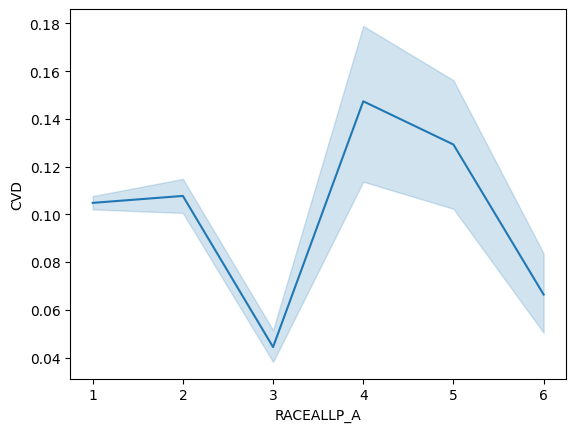

In [ ]:
sns.lineplot(data=data, x="RACEALLP_A", y="CVD")
# this graph is not very useful because asians might be on average younger than whites, african-americans, aians, etc

In [ ]:
data.to_csv("mergeddata.csv")

In [ ]:
def one_hot_encode_columns(df, column_names, top_x=100, thres=0):
    column_names = [attr.strip() for attr in column_names.split(",")]
    
    for column_name in column_names:
        # Get the value counts for each unique value in the column
        value_counts = df[column_name].value_counts()
        
        # Select the top x most frequent values
        top_x_values = value_counts.nlargest(top_x).index
        if len(value_counts)-len(top_x_values) > 0:
          bot_x_values = value_counts.nsmallest(len(value_counts)-len(top_x_values)).index
          for value in bot_x_values:
            print(column_name, value_counts[value])
          for value in value_counts.index:
            if value in bot_x_values or value_counts[value] < thres:
              if f"{column_name}_0" not in df.columns:
                df[f"{column_name}_0"] = (df[column_name] == value).astype(int)
              else:
                df[f"{column_name}_0"] = df[f"{column_name}_0"] + (df[column_name] == value).astype(int)
        else:
          for value in value_counts.index:
            if value_counts[value] < thres:
              if f"{column_name}_0" not in df.columns:
                df[f"{column_name}_0"] = (df[column_name] == value).astype(int)
              else:
                df[f"{column_name}_0"] = df[f"{column_name}_0"] + (df[column_name] == value).astype(int)
        # One-hot encode only the top x most frequent values
        for value in top_x_values:
            if value_counts[value] >= thres:
              new_col_name = f"{column_name}_{value}"
              df[new_col_name] = (df[column_name] == value).astype(int)
            else:
              print(column_name, value_counts[value])
        
        # Drop the original column
        df = df.drop(column_name, axis=1)
    
    return df

In [ ]:
data = one_hot_encode_columns(data, 'SMKCIGST_A, SMKECIGST_A, ORIENT_A, MARSTAT_A, PARSTAT_A, DIBTYPE_A, RACEALLP_A')

In [ ]:
# data = data.drop(columns=['EMDINDSTN1_A', 'EMDOCCUPN1_A'])

In [ ]:
data.columns

Index(['CVDDIAG_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A',
       'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'PAIFRQ3M_A',
       'CIGAREV_A', 'PIPEEV_A', 'SMOKELSEV_A', 'SUPPORT_A', 'CMPSUPPORT_A',
       'EMPWRKLSW1_A', 'EMPWRKFT1_A', 'EMDINDSTN1_A', 'EMDINDSTN2_A',
       'EMDOCCUPN1_A', 'EMDOCCUPN2_A', 'EMDSUPER_A', 'EMDWRKCAT1_A',
       'RATCAT_A', 'FDSCAT4_A', 'WEIGHTLBTC_A', 'AGEP_A', 'SEX_A', 'HISP_A',
       'HYPEV_A', 'HYPMED_A', 'CHLEV_A', 'CHLMED_A', 'ASEV_A', 'CANEV_A',
       'PREDIB_A', 'DIBEV_A', 'DIBINS_A', 'BMICAT_A', 'CVD', 'SMKCIGST_A_4',
       'SMKCIGST_A_3', 'SMKCIGST_A_1', 'SMKCIGST_A_2', 'SMKECIGST_A_3',
       'SMKECIGST_A_2', 'SMKECIGST_A_1', 'ORIENT_A_2', 'ORIENT_A_1',
       'ORIENT_A_3', 'ORIENT_A_5', 'ORIENT_A_4', 'MARSTAT_A_1', 'MARSTAT_A_3',
       'MARSTAT_A_2', 'MARSTAT_A_4', 'PARSTAT_A_3', 'PARSTAT_A_1',
       'PARSTAT_A_2', 'DIBTYPE_A_4', 'DIBTYPE_A_2', 'DIBTYPE_A_1',
       'DIBTYPE_A_3', 'RACEALLP_A_1', 'RACEALLP_A_2', 'RACEAL

6490


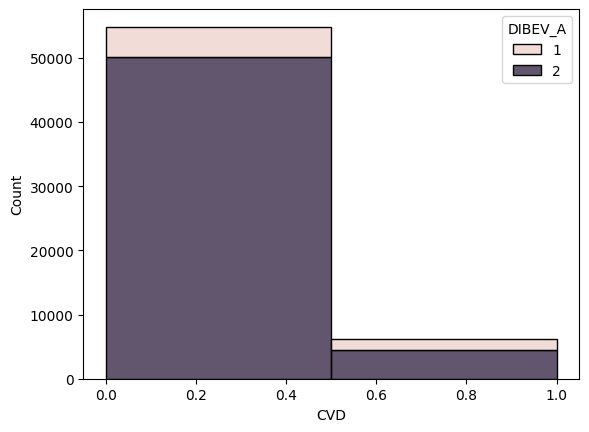

In [ ]:
# sns.histplot(binwidth=0.5, x="CVD", hue="SMKCIGST_A", data=data, stat="count", multiple="stack")
sns.histplot(binwidth=0.5, x="CVD", hue="DIBEV_A", data=data, stat="count", multiple="stack")
print(data[data["DIBEV_A"] == 1].shape[0])

22151


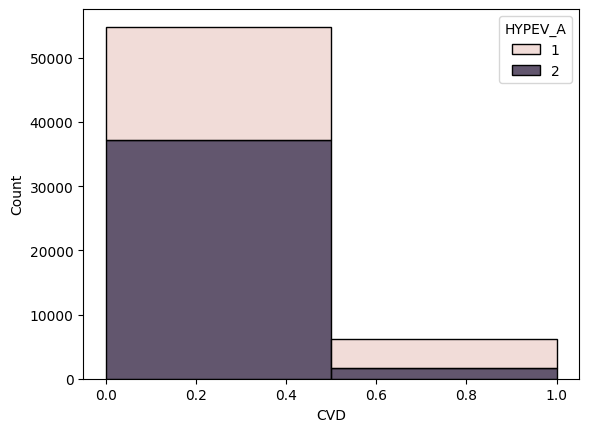

In [ ]:
sns.histplot(binwidth=0.5, x="CVD", hue="HYPEV_A", data=data, stat="count", multiple="stack")
print(data[data["HYPEV_A"] == 1].shape[0])

7784


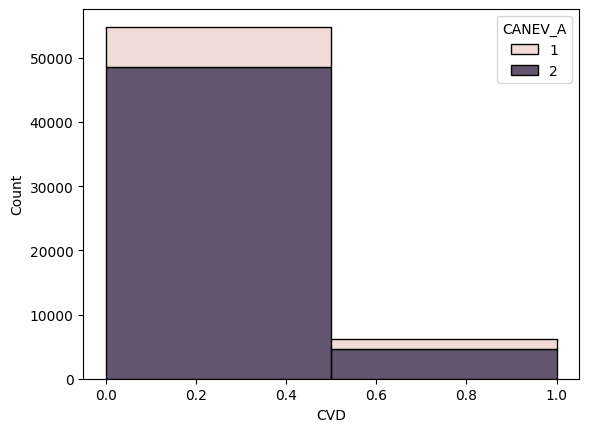

In [ ]:
sns.histplot(binwidth=0.5, x="CVD", hue="CANEV_A", data=data, stat="count", multiple="stack")
print(data[data["CANEV_A"] == 1].shape[0])

924


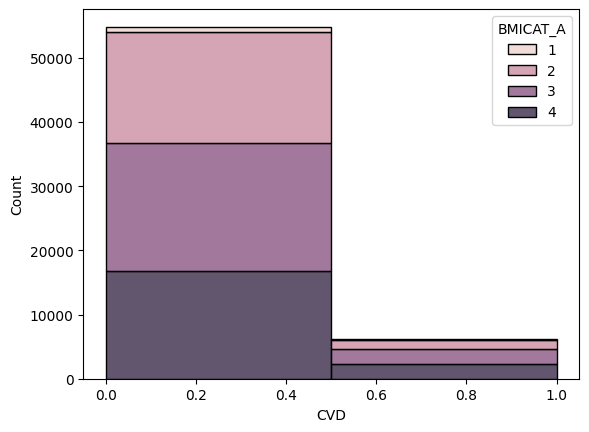

In [ ]:

sns.histplot(binwidth=0.5, x="CVD", hue="BMICAT_A", data=data, stat="count", multiple="stack")
print(data[data["BMICAT_A"] == 1].shape[0])

<Axes: xlabel='BMICAT_A', ylabel='CVD'>

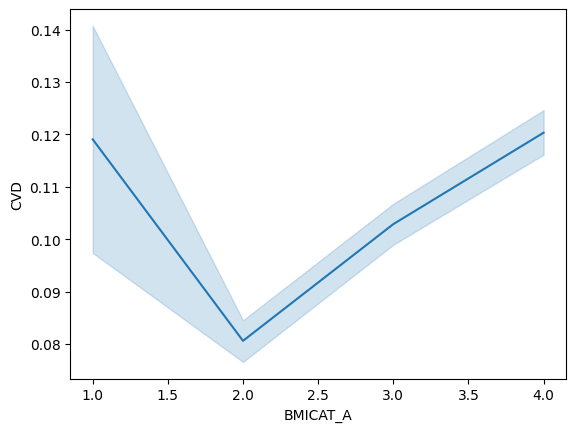

In [ ]:
sns.lineplot(data=data, x="BMICAT_A", y="CVD")

35816


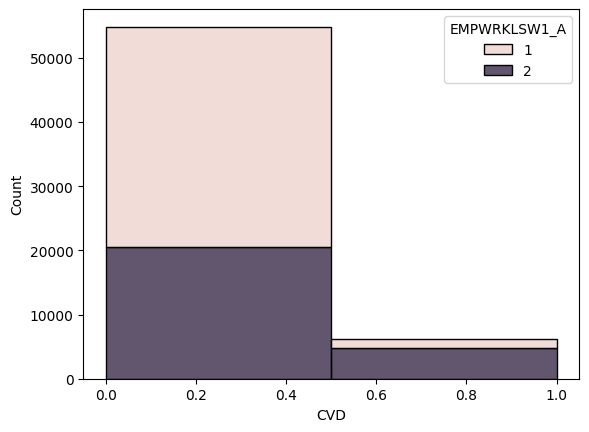

In [ ]:
sns.histplot(binwidth=0.5, x="CVD", hue="EMPWRKLSW1_A", data=data, stat="count", multiple="stack")
print(data[data["EMPWRKLSW1_A"] == 1].shape[0])

27771


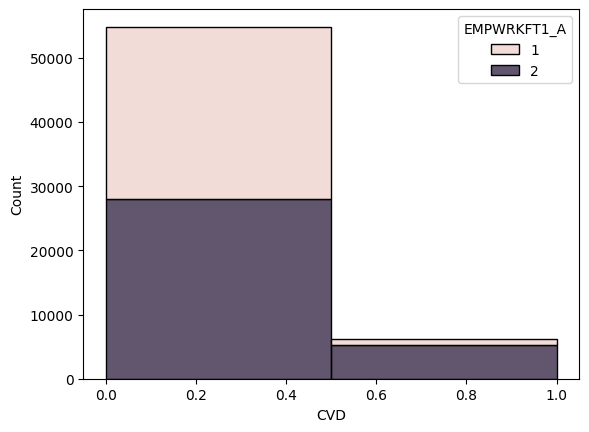

In [ ]:
sns.histplot(binwidth=0.5, x="CVD", hue="EMPWRKFT1_A", data=data, stat="count", multiple="stack")
print(data[data["EMPWRKFT1_A"] == 1].shape[0])

12582


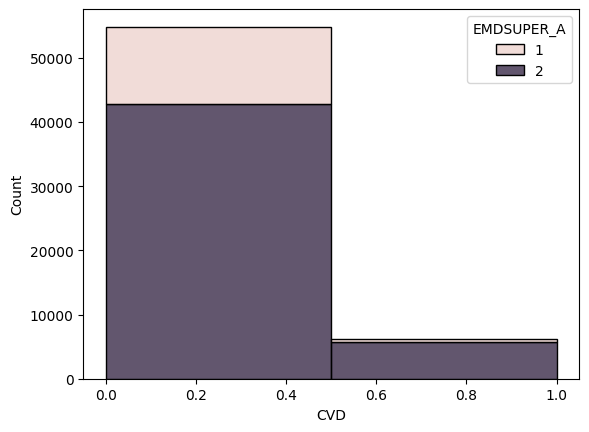

In [ ]:
sns.histplot(binwidth=0.5, x="CVD", hue="EMDSUPER_A", data=data, stat="count", multiple="stack")
print(data[data["EMDSUPER_A"] == 1].shape[0])

1427


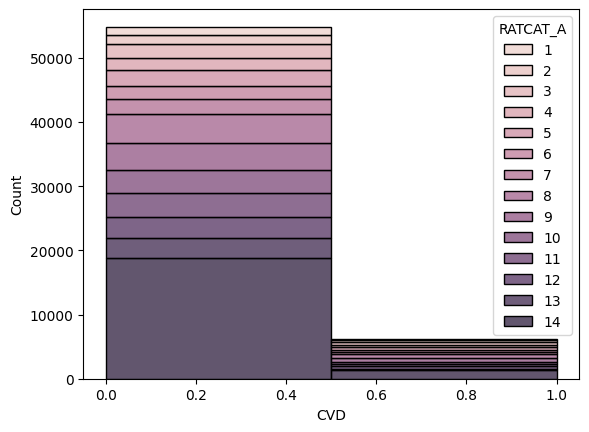

In [ ]:
sns.histplot(binwidth=0.5, x="CVD", hue="RATCAT_A", data=data, stat="count", multiple="stack")
print(data[data["RATCAT_A"] == 1].shape[0])

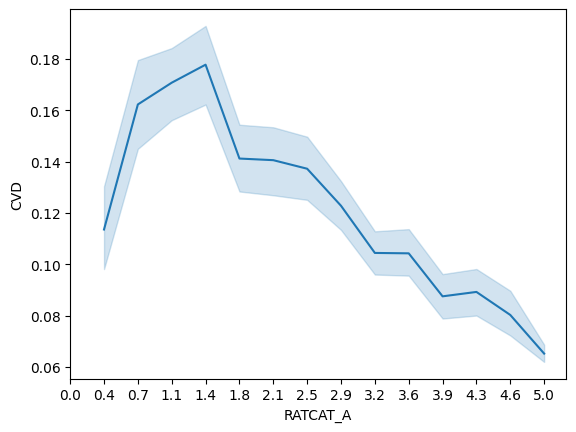

In [ ]:
sns.lineplot(data=data, x="RATCAT_A", y="CVD")
# Define old and new ranges
old_range = np.linspace(0, 14, num=15)
new_range = np.linspace(0, 5, num=15)

# Update ticks
plt.xticks(old_range, ["{:.1f}".format(i) for i in new_range])

plt.show()

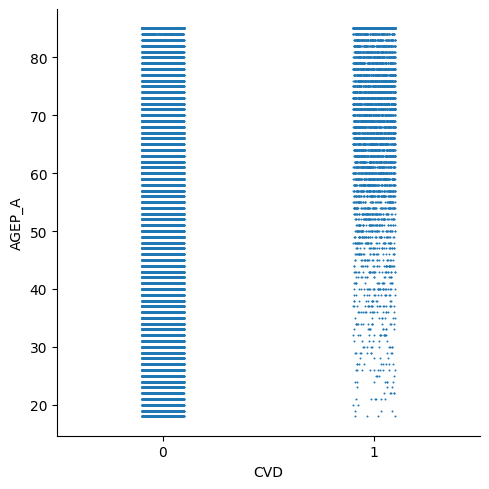

In [ ]:
sample_data = data.sample(2000)
sample_data['AGEP_A'] += np.random.uniform(low=-0.5, high=0.5, size=len(sample_data))
sns.catplot(data=sample_data, x="CVD", y="AGEP_A", s=10)

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is stored in a Pandas DataFrame called 'data'
# Group the data by CVD status
grouped = data.groupby('CVD')

# Create a list of all unique age values
ages = sorted(data['AGEP_A'].unique())

# Create two empty lists to store the counts of people with and without CVD for each age
counts_cvd1 = []
counts_cvd0 = []

# Iterate over each age value and count the number of people with and without CVD
for age in ages:
    vc1 = grouped.get_group(1)['AGEP_A'].value_counts()
    counts_cvd1.append(vc1.loc[age] if age in vc1.index else 0)
    
    vc0 = grouped.get_group(0)['AGEP_A'].value_counts()
    counts_cvd0.append(vc0.loc[age] if age in vc0.index else 0)

# Convert the counts to a Pandas DataFrame
df_counts = pd.DataFrame({'CVD=1': counts_cvd1, 'CVD=0': counts_cvd0}, index=ages)

# Create a stacked bar plot with a gap between the bars
ax = df_counts.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.9, color=['#1f77b4', '#ff7f0e'])

# Add text labels showing the percentage of people with CVD on top of each bar
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() + 5

# Modify the x-axis labels to show "85+" for the last label
labels = ax.get_xticklabels()
new_labels = [label.get_text() if label.get_text() != "85" else "85+" for label in labels]
ax.set_xticklabels(new_labels)

# Adjust the axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Count of People by Age and CVD Status')
ax.legend(loc='upper left')

# Show the plot
plt.show()


<Axes: xlabel='AGEP_A', ylabel='CVD'>

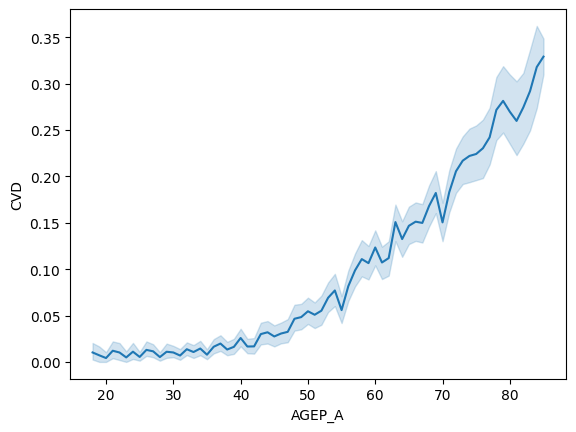

In [ ]:
sns.lineplot(data=data, x="AGEP_A", y="CVD")

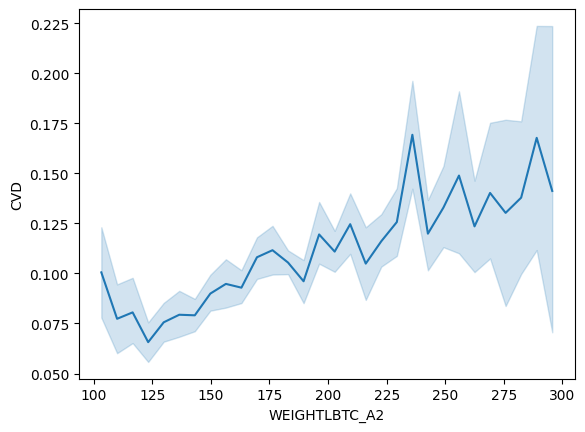

In [ ]:
data["WEIGHTLBTC_A2"] = pd.cut(data["WEIGHTLBTC_A"], bins=30)
temp = []
for i in range(data.shape[0]):
  temp.append((data["WEIGHTLBTC_A2"][i].left+data["WEIGHTLBTC_A2"][i].right)/2)

data["WEIGHTLBTC_A2"] = temp
sns.lineplot(data=data, x="WEIGHTLBTC_A2", y="CVD")
data.drop(columns="WEIGHTLBTC_A2", inplace=True)

In [ ]:
temp = data.drop(columns='EMDINDSTN2_A,EMDOCCUPN2_A,EMDWRKCAT1_A,EMDINDSTN1_A,EMDOCCUPN1_A'.split(','))
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(temp), columns = temp.columns)

In [ ]:
df['EMDINDSTN2_A']=data['EMDINDSTN2_A']

In [ ]:
imputer = KNNImputer(n_neighbors=1)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
ind2=df['EMDINDSTN2_A']
df=df.drop(columns='EMDINDSTN2_A')
df['EMDOCCUPN2_A']=data['EMDOCCUPN2_A']
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
occ2=df['EMDOCCUPN2_A']
df=df.drop(columns='EMDOCCUPN2_A')
df['EMDWRKCAT1_A']=data['EMDWRKCAT1_A']
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
wrkcat=df['EMDWRKCAT1_A']
df=df.drop(columns='EMDWRKCAT1_A')
df['EMDINDSTN1_A']=data['EMDINDSTN1_A']
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
ind1=df['EMDINDSTN1_A']
df=df.drop(columns='EMDINDSTN1_A')
df['EMDOCCUPN1_A']=data['EMDOCCUPN1_A']
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
df['EMDOCCUPN2_A']=occ2
df['EMDINDSTN2_A']=ind2
df['EMDWRKCAT1_A']=wrkcat
df['EMDINDSTN1_A']=ind1

In [ ]:
df.to_csv("after_imputation.csv", index=False)

In [ ]:
df = pd.read_csv("after_imputation.csv")

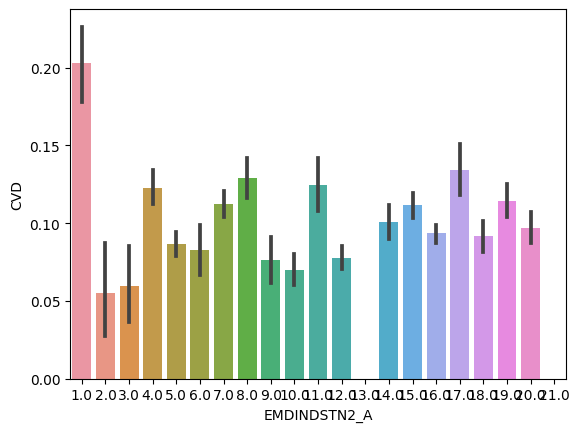

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=df, x="EMDINDSTN2_A", y="CVD")
plt.show()
###### filter out the industries that have very few samples

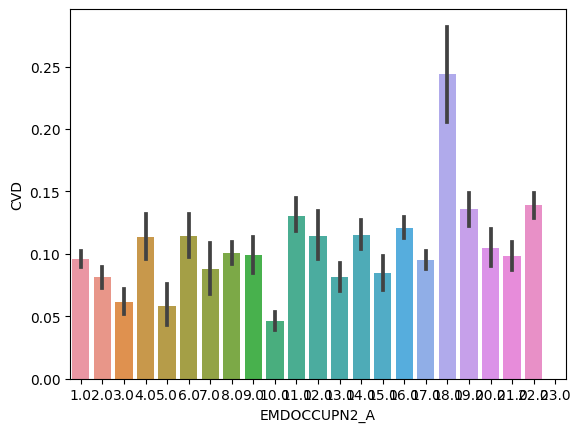

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=df, x="EMDOCCUPN2_A", y="CVD")
plt.show()
###### filter out the occupations that have very few samples

In [ ]:
def one_hot_encode_columns(df, column_names, top_x=100, thres=0):
    column_names = [attr.strip() for attr in column_names.split(",")]
    
    for column_name in column_names:
        # Get the value counts for each unique value in the column
        value_counts = df[column_name].value_counts()
        
        # Select the top x most frequent values
        top_x_values = value_counts.nlargest(top_x).index # 1,2,3,4
        if len(value_counts)-len(top_x_values) > 0:
          bot_x_values = value_counts.nsmallest(len(value_counts)-len(top_x_values)).index
          for value in bot_x_values:
            print(column_name, value_counts[value])
          for value in value_counts.index:
            if value in bot_x_values or value_counts[value] < thres:
              if f"{column_name}_0" not in df.columns:
                df[f"{column_name}_0"] = (df[column_name] == value).astype(int)
              else:
                df[f"{column_name}_0"] = df[f"{column_name}_0"] + (df[column_name] == value).astype(int)
        else:
          for value in value_counts.index:
            if value_counts[value] < thres:
              if f"{column_name}_0" not in df.columns:
                df[f"{column_name}_0"] = (df[column_name] == value).astype(int)
              else:
                df[f"{column_name}_0"] = df[f"{column_name}_0"] + (df[column_name] == value).astype(int)
        # One-hot encode only the top x most frequent values
        for value in top_x_values:
            if value_counts[value] >= thres:
              new_col_name = f"{column_name}_{value}"
              df[new_col_name] = (df[column_name] == value).astype(int)
            else:
              print(column_name, value_counts[value])
        
        # Drop the original column
        df = df.drop(column_name, axis=1)
    
    return df

In [ ]:
occ2 = df['EMDOCCUPN2_A']
ind2 = df['EMDINDSTN2_A']
wrkcat = df['EMDWRKCAT1_A']
occ1 = df['EMDOCCUPN1_A']
ind1 = df['EMDINDSTN1_A']

df = one_hot_encode_columns(df, 'EMDINDSTN2_A,EMDOCCUPN2_A,EMDWRKCAT1_A,EMDOCCUPN1_A,EMDINDSTN1_A', 100, 500)

EMDINDSTN2_A 387
EMDINDSTN2_A 218
EMDINDSTN2_A 46
EMDINDSTN2_A 39
EMDOCCUPN2_A 38
EMDWRKCAT1_A 220
EMDOCCUPN1_A 499
EMDOCCUPN1_A 470
EMDOCCUPN1_A 468
EMDOCCUPN1_A 457
EMDOCCUPN1_A 450
EMDOCCUPN1_A 446
EMDOCCUPN1_A 435
EMDOCCUPN1_A 428
EMDOCCUPN1_A 407
EMDOCCUPN1_A 318
EMDOCCUPN1_A 316
EMDOCCUPN1_A 313
EMDOCCUPN1_A 298
EMDOCCUPN1_A 291
EMDOCCUPN1_A 278
EMDOCCUPN1_A 248
EMDOCCUPN1_A 241
EMDOCCUPN1_A 223
EMDOCCUPN1_A 207
EMDOCCUPN1_A 204
EMDOCCUPN1_A 203
EMDOCCUPN1_A 188
EMDOCCUPN1_A 168
EMDOCCUPN1_A 167
EMDOCCUPN1_A 162
EMDOCCUPN1_A 159
EMDOCCUPN1_A 151
EMDOCCUPN1_A 146
EMDOCCUPN1_A 143
EMDOCCUPN1_A 141
EMDOCCUPN1_A 134
EMDOCCUPN1_A 121
EMDOCCUPN1_A 115
EMDOCCUPN1_A 105
EMDOCCUPN1_A 105
EMDOCCUPN1_A 80
EMDOCCUPN1_A 76
EMDOCCUPN1_A 76
EMDOCCUPN1_A 74
EMDOCCUPN1_A 71
EMDOCCUPN1_A 69
EMDOCCUPN1_A 64
EMDOCCUPN1_A 60
EMDOCCUPN1_A 59
EMDOCCUPN1_A 42
EMDOCCUPN1_A 42
EMDOCCUPN1_A 40
EMDOCCUPN1_A 38
EMDOCCUPN1_A 38
EMDOCCUPN1_A 37
EMDOCCUPN1_A 36
EMDOCCUPN1_A 29
EMDOCCUPN1_A 23
EMDOCCUPN1_A 17
EM

<ipython-input-163-297f25d2e44e>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = (df[column_name] == value).astype(int)
<ipython-input-163-297f25d2e44e>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = (df[column_name] == value).astype(int)
<ipython-input-163-297f25d2e44e>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

In [ ]:
# for col in df.columns:
#   if col.startswith("EMDOCCUPN") or col.startswith("EMDINDSTN") or col.startswith("EMDWRKCAT"):
#     df.drop(col, axis=1, inplace=True)
# df['EMDINDSTN2_A'] = ind
# df['EMDOCCUPN2_A'] = occ
# df['EMDWRKCAT1_A'] = wrkcat

In [ ]:
simple_cols = []
for col in df.columns:
  if col.startswith("EMDOCCUPN2") or col.startswith("EMDINDSTN2"):
    simple_cols.append(col)

df_detailed = df.drop(simple_cols, axis=1)

In [ ]:
detailed_cols = []
for col in df.columns:
  if col.startswith("EMDOCCUPN1") or col.startswith("EMDINDSTN1"):
    detailed_cols.append(col)

df_simple = df.drop(detailed_cols, axis=1)

In [ ]:
df = df.astype(float)
df_detailed = df_detailed.astype(float)
df_simple = df_simple.astype(float)

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_detailed = pd.DataFrame(scaler.fit_transform(df_detailed), columns = df_detailed.columns)
df_simple = pd.DataFrame(scaler.fit_transform(df_simple), columns = df_simple.columns)

In [ ]:
df.to_csv('finalpreprocessed.csv', index=False)
df_detailed.to_csv('finalpreprocessed_detailed.csv', index=False)
df_simple.to_csv('finalpreprocessed_simple.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
%matplotlib inline

data = pd.read_csv("finalpreprocessed_detailed.csv")

In [ ]:
rank_points = pd.Series(np.zeros(len(data.columns)), index=data.columns)

In [ ]:
corr_matrix = data.corr(method='pearson')
corr_vec = []
for i, col in enumerate(data.columns):
  for j, row in enumerate(data.columns):
    corr_vec.append((corr_matrix[col][row], col, row))
corr_vec.sort(reverse=True, key=lambda x: x[0])
for i in range(len(corr_vec)):
  if i < 170 and corr_vec[i][0] < 1:
    print(corr_vec[i][1], corr_vec[i][2], corr_vec[i][0])

DIBEV_A DIBTYPE_A_4 0.9690301061632859
DIBTYPE_A_4 DIBEV_A 0.9690301061632859
HYPEV_A HYPMED_A 0.8672586502124204
HYPMED_A HYPEV_A 0.8672586502124204
ANXMED_A MHRX_A 0.7958851063284431
MHRX_A ANXMED_A 0.7958851063284431
EMPWRKLSW1_A EMPWRKFT1_A 0.7667700376901186
EMPWRKFT1_A EMPWRKLSW1_A 0.7667700376901186
CHLEV_A CHLMED_A 0.7598298998477572
CHLMED_A CHLEV_A 0.7598298998477572
WEIGHTLBTC_A BMICAT_A 0.7357893304077044
BMICAT_A WEIGHTLBTC_A 0.7357893304077044
DEPMED_A MHRX_A 0.7282636266492127
MHRX_A DEPMED_A 0.7282636266492127
EMDOCCUPN1_A_70.0 EMDINDSTN1_A_10.0 0.6938521557859717
EMDINDSTN1_A_10.0 EMDOCCUPN1_A_70.0 0.6938521557859717
ANXMED_A DEPMED_A 0.6502318853108703
DEPMED_A ANXMED_A 0.6502318853108703
DEPFREQ_A DEPLEVEL_A 0.6266737962967535
DEPLEVEL_A DEPFREQ_A 0.6266737962967535
ANXFREQ_A DEPFREQ_A 0.5972978218985437
DEPFREQ_A ANXFREQ_A 0.5972978218985437
DIBEV_A DIBINS_A 0.5362216802611093
DIBINS_A DIBEV_A 0.5362216802611093
DIBINS_A DIBTYPE_A_4 0.5331647004080642
DIBTYPE_A_4 DI

In [ ]:
print(confusion_matrix(data["DIBTYPE_A_4"], data["DIBEV_A"])) # remove DIBTYPE_A_4
print(confusion_matrix(data["HYPMED_A"], data["HYPEV_A"]))
print(confusion_matrix(data["EMPWRKLSW1_A"], data["EMPWRKFT1_A"]))

[[ 6134     0]
 [  356 54560]]
[[18307     0]
 [ 3844 38899]]
[[27771  8045]
 [    0 25234]]


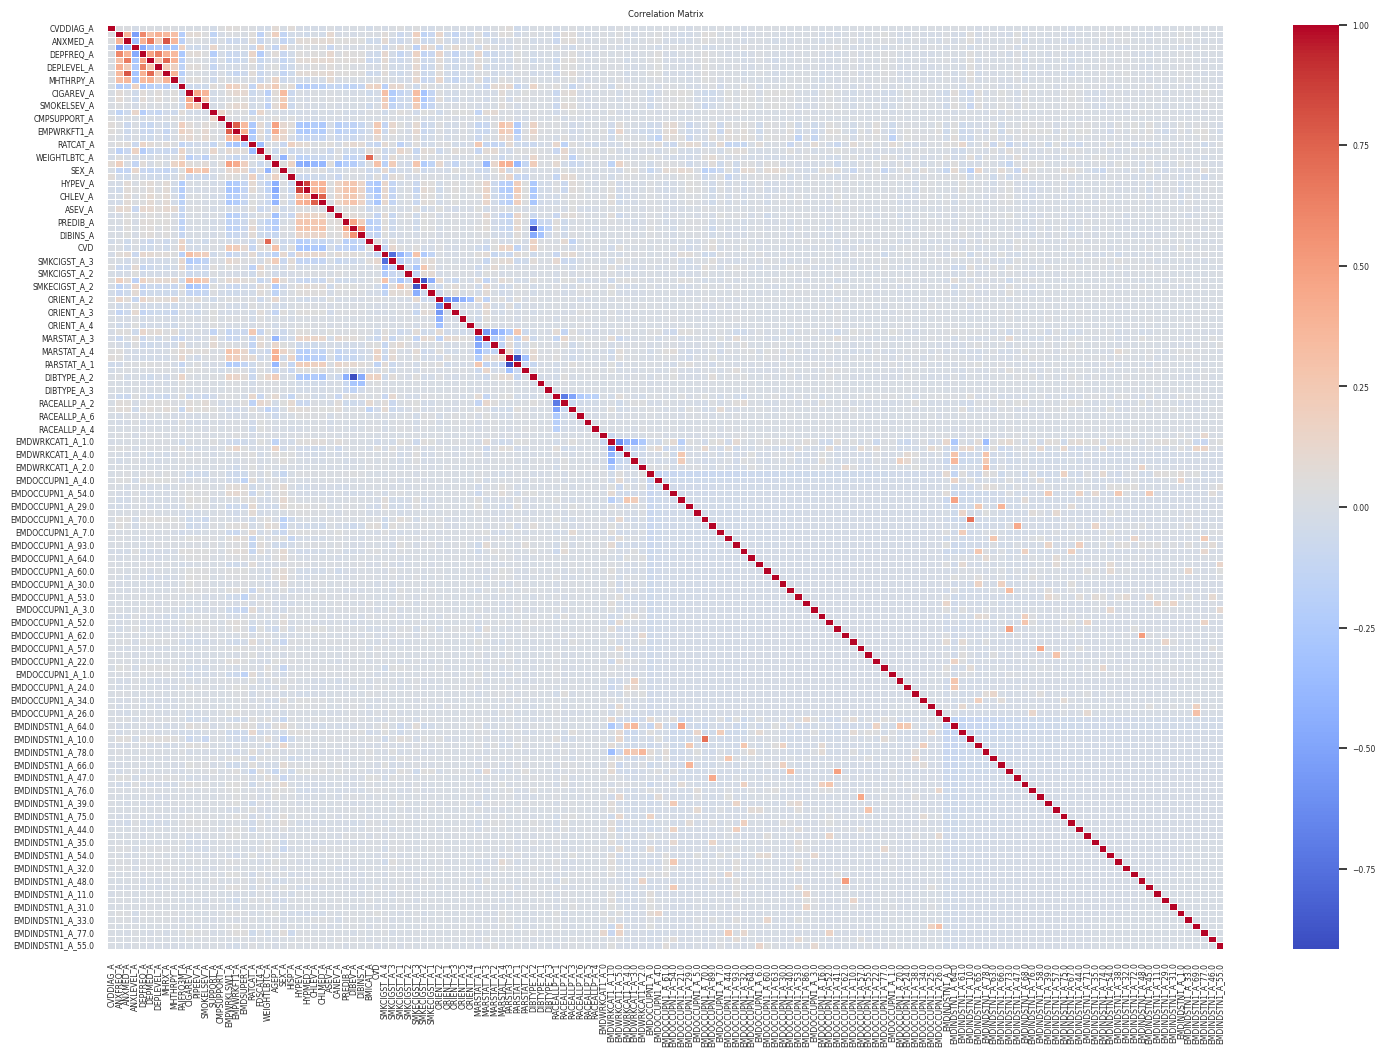

In [ ]:
data.drop('DIBTYPE_A_4', axis=1, inplace=True)
corr_matrix.drop('DIBTYPE_A_4', axis=1, inplace=True)
corr_matrix.drop('DIBTYPE_A_4', axis=0, inplace=True)
rank_points.drop('DIBTYPE_A_4', inplace=True)

cvd_corr = corr_matrix["CVD"].sort_values(ascending=False)

for i, name in enumerate(cvd_corr.index):
  rank_points[name] = rank_points[name] + i + 1

plt.figure(figsize=(18, 12))
sns.set(font_scale=0.5)
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<Axes: >

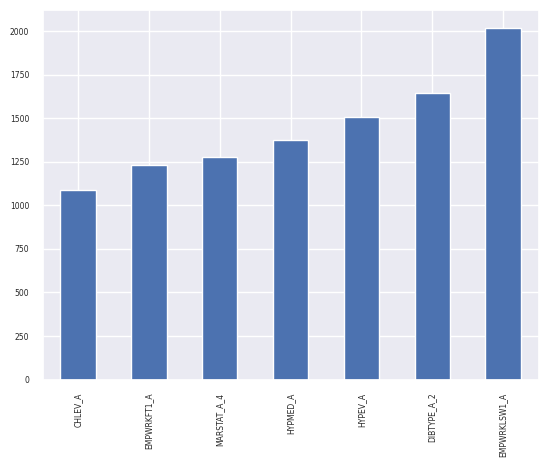

In [ ]:
#chi square test
X = data.drop('CVD',axis=1)
y = data['CVD']
chi_scores = chi2(X,y)

ch_values = pd.Series(chi_scores[0], index=X.columns)
ch_values.sort_values(ascending=False, inplace=True)

p_values = pd.Series(chi_scores[1], index=X.columns)

# for name in ch_values.index:
#   print(ch_values[name], p_values[name])

for i, name in enumerate(ch_values.index):
  rank_points[name] = rank_points[name] + i + 1

ch_values = ch_values[ch_values>=1000]
ch_values.sort_values(ascending = True, inplace = True)

ch_values.plot.bar()

In [ ]:
# Information gain
importances = mutual_info_classif(X, y)

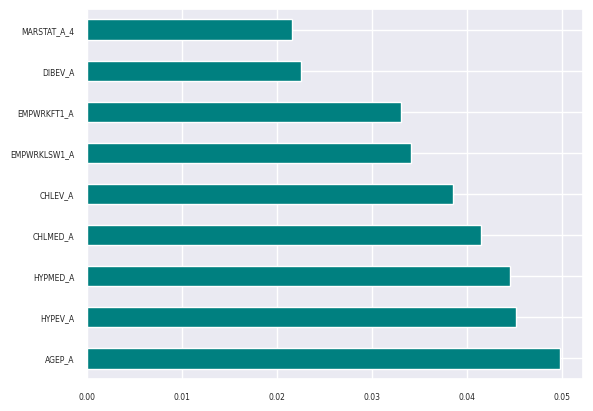

In [ ]:
feat_importances = pd.Series(importances, data.columns[0: len(data.columns)-1])
feat_importances.sort_values(ascending=False, inplace=True)

for i, name in enumerate(feat_importances.index):
  rank_points[name] = rank_points[name] + i + 1

feat_importances = feat_importances[feat_importances>0.02]
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

## Feature Selection

In [ ]:
rank_points.sort_values(ascending=True, inplace=True)
rank_points.drop('CVD', inplace=True)
# for i, name in enumerate(rank_points.index):
#   print(name, rank_points[name])

In [ ]:
best_features_80 = rank_points.nsmallest(80).index
best_features_60 = rank_points.nsmallest(60).index
best_features_40 = rank_points.nsmallest(40).index
best_features_25 = rank_points.nsmallest(25).index

<Axes: >

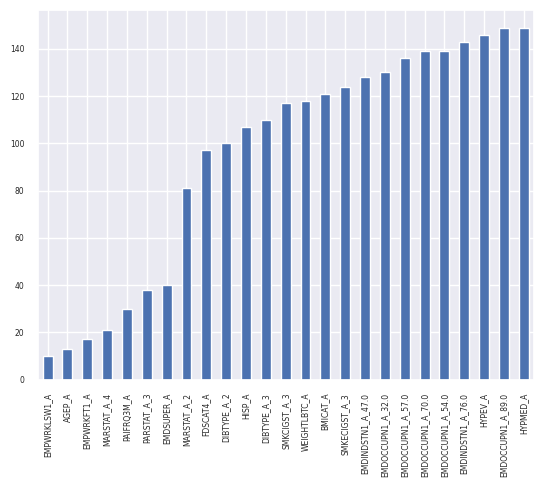

In [ ]:
# plt.bar(x=best_features_25, height=rank_points.nsmallest(25))
ser = rank_points.nsmallest(25)
ser.plot.bar()

In [ ]:
data25 = data[best_features_25]
data25["CVD"] = data["CVD"]

data40 = data[best_features_40]
data40["CVD"] = data["CVD"]

data60 = data[best_features_60]
data60["CVD"] = data["CVD"]

data80 = data[best_features_80]
data80["CVD"] = data["CVD"]

<ipython-input-202-8d612d407f77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data25["CVD"] = data["CVD"]
<ipython-input-202-8d612d407f77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data40["CVD"] = data["CVD"]
<ipython-input-202-8d612d407f77>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
data25.to_csv("data25_detailed.csv", index=False)
data40.to_csv("data40_detailed.csv", index=False)
data60.to_csv("data60_detailed.csv", index=False)
data80.to_csv("data80_detailed.csv", index=False)

In [ ]:
data = pd.read_csv("finalpreprocessed_simple.csv")

In [ ]:
rank_points = pd.Series(np.zeros(len(data.columns)), index=data.columns)

In [ ]:
corr_matrix = data.corr(method='pearson')
corr_vec = []
for i, col in enumerate(data.columns):
  for j, row in enumerate(data.columns):
    corr_vec.append((corr_matrix[col][row], col, row))
corr_vec.sort(reverse=True, key=lambda x: x[0])
for i in range(len(corr_vec)):
  if i < 135 and corr_vec[i][0] < 1:
    print(corr_vec[i][1], corr_vec[i][2], corr_vec[i][0])

DIBEV_A DIBTYPE_A_4 0.9690301061632859
DIBTYPE_A_4 DIBEV_A 0.9690301061632859
HYPEV_A HYPMED_A 0.8672586502124204
HYPMED_A HYPEV_A 0.8672586502124204
ANXMED_A MHRX_A 0.7958851063284431
MHRX_A ANXMED_A 0.7958851063284431
EMPWRKLSW1_A EMPWRKFT1_A 0.7667700376901186
EMPWRKFT1_A EMPWRKLSW1_A 0.7667700376901186
CHLEV_A CHLMED_A 0.7598298998477572
CHLMED_A CHLEV_A 0.7598298998477572
WEIGHTLBTC_A BMICAT_A 0.7357893304077044
BMICAT_A WEIGHTLBTC_A 0.7357893304077044
DEPMED_A MHRX_A 0.7282636266492127
MHRX_A DEPMED_A 0.7282636266492127
EMDINDSTN2_A_4.0 EMDOCCUPN2_A_19.0 0.7171058970308796
EMDOCCUPN2_A_19.0 EMDINDSTN2_A_4.0 0.7171058970308796
EMDINDSTN2_A_15.0 EMDOCCUPN2_A_8.0 0.6818889216258069
EMDOCCUPN2_A_8.0 EMDINDSTN2_A_15.0 0.6818889216258069
EMDINDSTN2_A_1.0 EMDOCCUPN2_A_18.0 0.6689371305752626
EMDOCCUPN2_A_18.0 EMDINDSTN2_A_1.0 0.6689371305752626
ANXMED_A DEPMED_A 0.6502318853108703
DEPMED_A ANXMED_A 0.6502318853108703
DEPFREQ_A DEPLEVEL_A 0.6266737962967535
DEPLEVEL_A DEPFREQ_A 0.6266737

In [ ]:
print(confusion_matrix(data["DIBTYPE_A_4"], data["DIBEV_A"])) # remove DIBTYPE_A_4
print(confusion_matrix(data["HYPMED_A"], data["HYPEV_A"]))
print(confusion_matrix(data["EMPWRKLSW1_A"], data["EMPWRKFT1_A"]))

[[ 6134     0]
 [  356 54560]]
[[18307     0]
 [ 3844 38899]]
[[27771  8045]
 [    0 25234]]


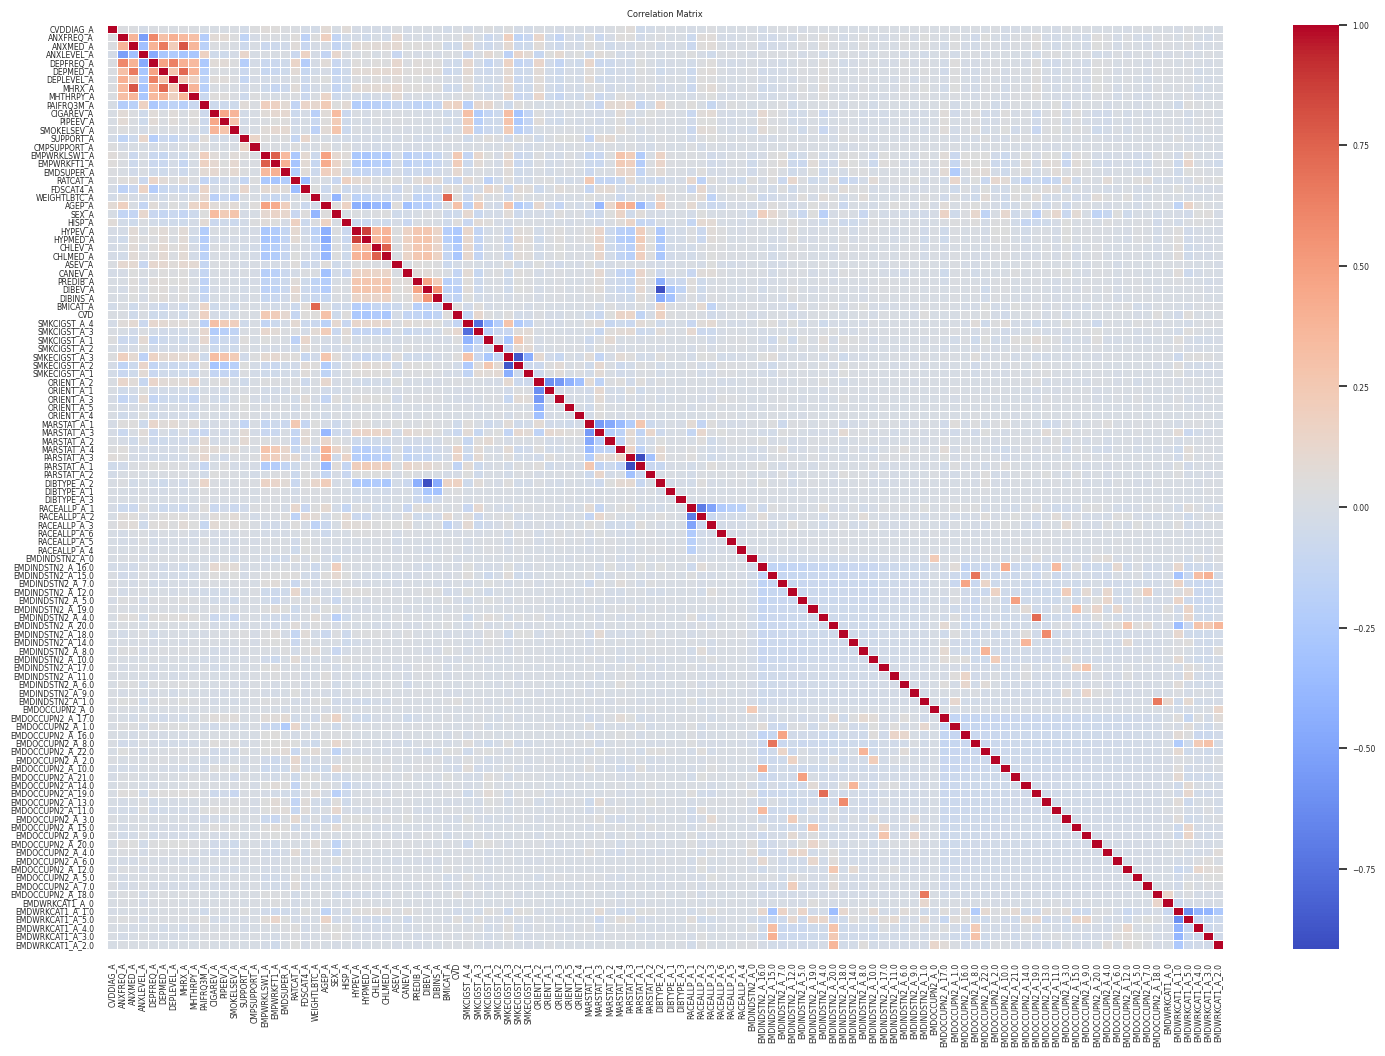

In [ ]:
data.drop('DIBTYPE_A_4', axis=1, inplace=True)
corr_matrix.drop('DIBTYPE_A_4', axis=1, inplace=True)
corr_matrix.drop('DIBTYPE_A_4', axis=0, inplace=True)
rank_points.drop('DIBTYPE_A_4', inplace=True)

cvd_corr = corr_matrix["CVD"].sort_values(ascending=False)

for i, name in enumerate(cvd_corr.index):
  rank_points[name] = rank_points[name] + i + 1

plt.figure(figsize=(18, 12))
sns.set(font_scale=0.5)
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<Axes: >

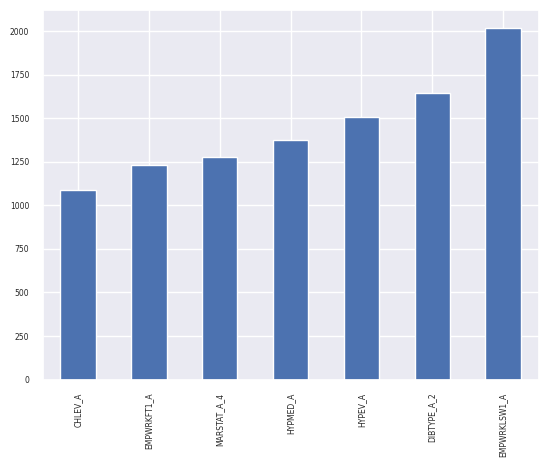

In [ ]:
#chi square test
X = data.drop('CVD',axis=1)
y = data['CVD']
chi_scores = chi2(X,y)

ch_values = pd.Series(chi_scores[0], index=X.columns)
ch_values.sort_values(ascending=False, inplace=True)

p_values = pd.Series(chi_scores[1], index=X.columns)

# for name in ch_values.index:
#   print(ch_values[name], p_values[name])

for i, name in enumerate(ch_values.index):
  rank_points[name] = rank_points[name] + i + 1

ch_values = ch_values[ch_values>=1000]
ch_values.sort_values(ascending = True, inplace = True)

ch_values.plot.bar()

In [ ]:
# Information gain
importances = mutual_info_classif(X, y)

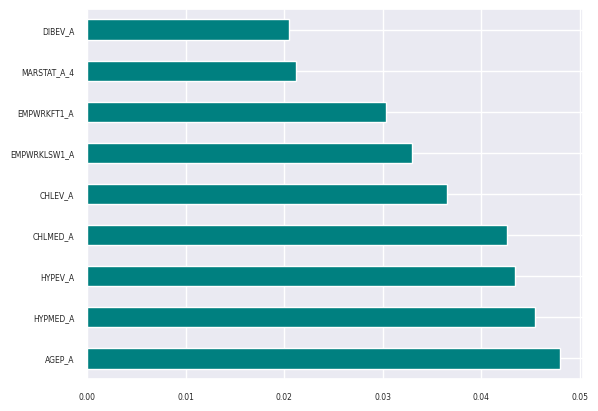

In [ ]:
feat_importances = pd.Series(importances, data.columns[0: len(data.columns)-1])
feat_importances.sort_values(ascending=False, inplace=True)

for i, name in enumerate(feat_importances.index):
  rank_points[name] = rank_points[name] + i + 1

feat_importances = feat_importances[feat_importances>0.02]
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [ ]:
rank_points.sort_values(ascending=True, inplace=True)
rank_points.drop('CVD', inplace=True)
# for i, name in enumerate(rank_points.index):
#   print(name, rank_points[name])

In [ ]:
best_features_80 = rank_points.nsmallest(80).index
best_features_60 = rank_points.nsmallest(60).index
best_features_40 = rank_points.nsmallest(40).index
best_features_25 = rank_points.nsmallest(25).index

In [ ]:
data25 = data[best_features_25]
data25["CVD"] = data["CVD"]

data40 = data[best_features_40]
data40["CVD"] = data["CVD"]

data60 = data[best_features_60]
data60["CVD"] = data["CVD"]

data80 = data[best_features_80]
data80["CVD"] = data["CVD"]

<ipython-input-214-8d612d407f77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data25["CVD"] = data["CVD"]
<ipython-input-214-8d612d407f77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data40["CVD"] = data["CVD"]
<ipython-input-214-8d612d407f77>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
data25.to_csv("data25_simple.csv", index=False)
data40.to_csv("data40_simple.csv", index=False)
data60.to_csv("data60_simple.csv", index=False)
data80.to_csv("data80_simple.csv", index=False)

#Model Fitting Begins

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
%matplotlib inline

data = pd.read_csv("finalpreprocessed_simple.csv")

In [ ]:
# occ25 = []
# ind25 = []
# for col in data.columns:
#   if col.startswith("EMDOCCUPN1"):
#     occ25 = data[col].value_counts().nlargest(25).index
#     break
#   elif col.startswith("EMDINDSTN1"):
#     ind25 = data[col].value_counts().nlargest(25).index

# data = pd.read_csv("finalpreprocessed_detailed.csv")
# print(occ25)
# print(ind25)
# for col in data.columns:
#   if col.startswith(EMDOCCUPN)

In [ ]:
selected_features = 'AGEP_A,SEX_A,RACEALLP_A_1,RACEALLP_A_2,RACEALLP_A_3,RACEALLP_A_4,RACEALLP_A_5,RACEALLP_A_6,HYPEV_A,CHLEV_A,DIBTYPE_A_1,DIBTYPE_A_2,DIBTYPE_A_3,SMKCIGST_A_1,SMKCIGST_A_2,SMKCIGST_A_3,SMKCIGST_A_4,HYPMED_A,CVD'
selected_columns = selected_features.split(',')
selected_columns_with_occ = selected_columns.copy()+[col for col in data.columns if col.startswith("EMDOCCUPN") or col.startswith("EMDINDSTN") or col.startswith("EMDWRKCAT")]
pce_features_data = data[selected_columns]
pce_and_occ_features_data = data[selected_columns_with_occ]

# pce_features_data0 = pce_features_data[pce_features_data['CVD']==0.0]
# pce_features_data1 = pce_features_data[pce_features_data['CVD']==1.0]
# pce_features_data0 = pce_features_data0.sample(n=10000, random_state=1)
# pce_features_data = pd.concat([pce_features_data0,pce_features_data1])
# pce_features_data =  pce_features_data.sample(frac = 1)

# pce_and_occ_features_data0 = pce_and_occ_features_data[pce_and_occ_features_data['CVD']==0.0]
# pce_and_occ_features_data1 = pce_and_occ_features_data[pce_and_occ_features_data['CVD']==1.0]
# pce_and_occ_features_data0 = pce_and_occ_features_data0.sample(n=10000, random_state=1)
# pce_and_occ_features_data = pd.concat([pce_and_occ_features_data0,pce_and_occ_features_data1])
# pce_and_occ_features_data = pce_and_occ_features_data.sample(frac = 1)

###Model fitting for PCE features alone. 
Models fitted: Random Forest, LR

In [ ]:
X = pce_features_data.drop('CVD', axis=1)
y = pce_features_data['CVD']

In [ ]:
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X_normalized)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
(tn, fp, fn, tp, f1)

Accuracy: 0.8905814905814906


(16095, 410, 1594, 216, 0.1773399014778325)

In [ ]:
# Initialize the KFold cross-validator with 10 folds
kf = KFold(n_splits=10)

total_training_accuracy = 0
total_testing_accuracy = 0
total_precision = 0
total_recall = 0
total_f1 = 0
fold = 1

# Find the class weights based on the inverse of their frequencies
class_weights = y.value_counts().to_dict()
for key in class_weights:
    class_weights[key] = 1 / class_weights[key]
    print(f"weights: {key}:{1 / class_weights[key]}")
# Initialize the Logistic Regression model with class weights and max_iter=1000
lr = LogisticRegression(max_iter=1000, class_weight=class_weights)

for train_index, test_index in kf.split(X_standardized):
    X_train, X_test = X_standardized[train_index], X_standardized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    lr.fit(X_train, y_train)

    # Compute the training accuracy
    training_accuracy = lr.score(X_train, y_train)

    # Make predictions using the test data
    y_test_pred = lr.predict(X_test)

    # Compute the testing accuracy, precision, recall, and F1 score
    testing_accuracy = lr.score(X_test, y_test)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print(f"Fold {fold}:")
    print(f"  Training accuracy: {training_accuracy * 100:.2f}%")
    print(f"  Testing accuracy: {testing_accuracy * 100:.2f}%")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1 score: {f1:.2f}")
    print()

    total_training_accuracy += training_accuracy
    total_testing_accuracy += testing_accuracy
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    fold += 1

# Calculate the average training accuracy, testing accuracy, precision, recall, and F1 score
average_training_accuracy = total_training_accuracy / (fold - 1)
average_testing_accuracy = total_testing_accuracy / (fold - 1)
average_precision = total_precision / (fold - 1)
average_recall = total_recall / (fold - 1)
average_f1 = total_f1 / (fold - 1)

print(f"Average training accuracy: {average_training_accuracy * 100:.2f}%")
print(f"Average testing accuracy: {average_testing_accuracy * 100:.2f}%")
print(f"Average precision: {average_precision:.2f}")
print(f"Average recall: {average_recall:.2f}")
print(f"Average F1 score: {average_f1:.2f}")


weights: 0.0:54843.0
weights: 1.0:6207.0
Fold 1:
  Training accuracy: 73.47%
  Testing accuracy: 75.02%
  Precision: 0.26
  Recall: 0.76
  F1 score: 0.39

Fold 2:
  Training accuracy: 73.59%
  Testing accuracy: 74.92%
  Precision: 0.26
  Recall: 0.75
  F1 score: 0.39

Fold 3:
  Training accuracy: 73.49%
  Testing accuracy: 74.17%
  Precision: 0.25
  Recall: 0.78
  F1 score: 0.38

Fold 4:
  Training accuracy: 73.38%
  Testing accuracy: 73.45%
  Precision: 0.24
  Recall: 0.79
  F1 score: 0.37

Fold 5:
  Training accuracy: 73.60%
  Testing accuracy: 73.01%
  Precision: 0.24
  Recall: 0.77
  F1 score: 0.36

Fold 6:
  Training accuracy: 72.85%
  Testing accuracy: 75.95%
  Precision: 0.23
  Recall: 0.76
  F1 score: 0.35

Fold 7:
  Training accuracy: 73.82%
  Testing accuracy: 71.48%
  Precision: 0.24
  Recall: 0.78
  F1 score: 0.37

Fold 8:
  Training accuracy: 73.56%
  Testing accuracy: 72.96%
  Precision: 0.24
  Recall: 0.76
  F1 score: 0.36

Fold 9:
  Training accuracy: 73.87%
  Testing a

###Model fitting for PCE + Occupatiion features. 
Models fitted: Random Forest, LR

In [ ]:
X = pce_and_occ_features_data.drop('CVD', axis=1)
y = pce_and_occ_features_data['CVD']

In [ ]:
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X_normalized)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
(tn, fp, fn, tp, f1)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the KFold cross-validator with 10 folds
kf = KFold(n_splits=10)

total_training_accuracy = 0
total_testing_accuracy = 0
total_precision = 0
total_recall = 0
total_f1 = 0
fold = 1

# Find the class weights based on the inverse of their frequencies
class_weights = y.value_counts().to_dict()
for key in class_weights:
    class_weights[key] = 1 / class_weights[key]
    print(f"weights: {key}:{1 / class_weights[key]}")
# Initialize the Logistic Regression model with class weights and max_iter=1000
lr = LogisticRegression(max_iter=1000, class_weight=class_weights)

for train_index, test_index in kf.split(X_standardized):
    X_train, X_test = X_standardized[train_index], X_standardized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    lr.fit(X_train, y_train)

    # Compute the training accuracy
    training_accuracy = lr.score(X_train, y_train)

    # Make predictions using the test data
    y_test_pred = lr.predict(X_test)

    # Compute the testing accuracy, precision, recall, and F1 score
    testing_accuracy = lr.score(X_test, y_test)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print(f"Fold {fold}:")
    print(f"  Training accuracy: {training_accuracy * 100:.2f}%")
    print(f"  Testing accuracy: {testing_accuracy * 100:.2f}%")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1 score: {f1:.2f}")
    print()

    total_training_accuracy += training_accuracy
    total_testing_accuracy += testing_accuracy
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    fold += 1

# Calculate the average training accuracy, testing accuracy, precision, recall, and F1 score
average_training_accuracy = total_training_accuracy / (fold - 1)
average_testing_accuracy = total_testing_accuracy / (fold - 1)
average_precision = total_precision / (fold - 1)
average_recall = total_recall / (fold - 1)
average_f1 = total_f1 / (fold - 1)

print(f"Average training accuracy: {average_training_accuracy * 100:.2f}%")
print(f"Average testing accuracy: {average_testing_accuracy * 100:.2f}%")
print(f"Average precision: {average_precision:.2f}")
print(f"Average recall: {average_recall:.2f}")
print(f"Average F1 score: {average_f1:.2f}")
